# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] # NOTE: you were missing this field, 'dt' is 'datetime' object

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | newman
Processing Record 3 of Set 1 | whakatane
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | fort st. john
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mount pearl
Processing Record 12 of Set 1 | alotau
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | maintirano
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | eagle
Processing Record 19 of Set 1 | aldan
Processing Record 20 of Set 1 | sur
Processing Record 21 of Set 1 | araxa
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 | kulhudhuffushi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,14.40,85,100,6.17,US,1731369928
1,newman,37.3138,-121.0208,12.80,82,75,2.60,US,1731369929
2,whakatane,-37.9585,176.9854,21.95,68,72,3.58,NZ,1731369930
3,iqaluit,63.7506,-68.5145,-10.15,85,75,1.03,CA,1731369931
4,fort st. john,56.2499,-120.8529,-1.06,93,100,1.54,CA,1731369932


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,14.40,85,100,6.17,US,1731369928
1,newman,37.3138,-121.0208,12.80,82,75,2.60,US,1731369929
2,whakatane,-37.9585,176.9854,21.95,68,72,3.58,NZ,1731369930
3,iqaluit,63.7506,-68.5145,-10.15,85,75,1.03,CA,1731369931
4,fort st. john,56.2499,-120.8529,-1.06,93,100,1.54,CA,1731369932


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

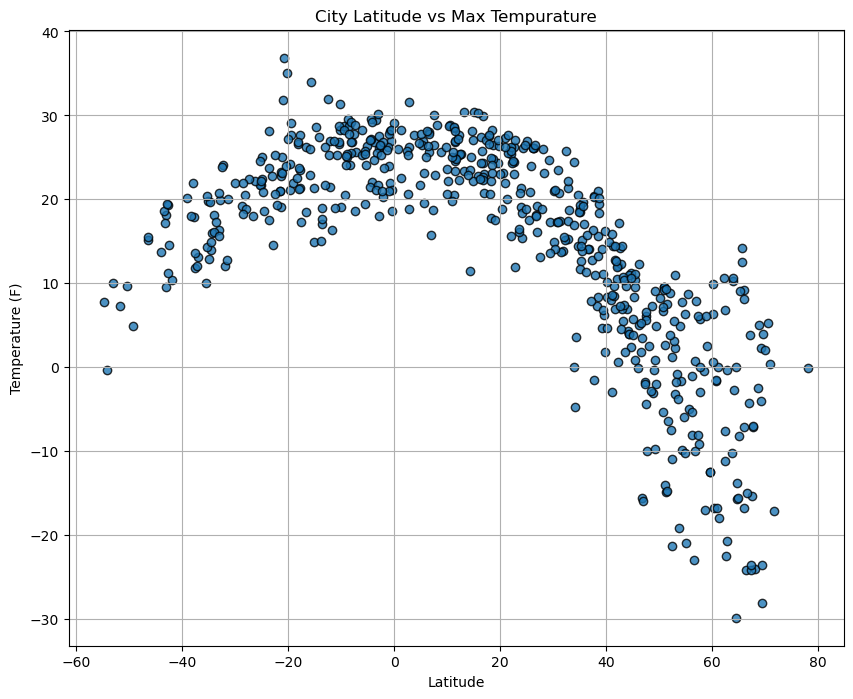

In [66]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, axl = plt.subplots(figsize=(10,8))

plt.scatter(x_values, y_values,alpha=0.80, edgecolors="black", linewidths=1)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs Max Tempurature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

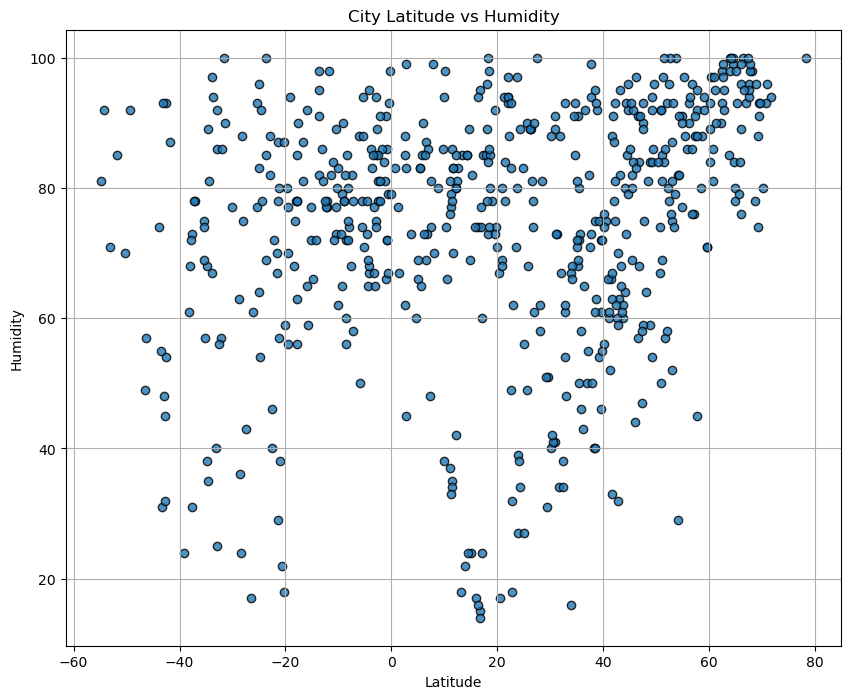

In [67]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, axl = plt.subplots(figsize=(10,8))

plt.scatter(x_values, y_values,alpha=0.80, edgecolors="black", linewidths=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

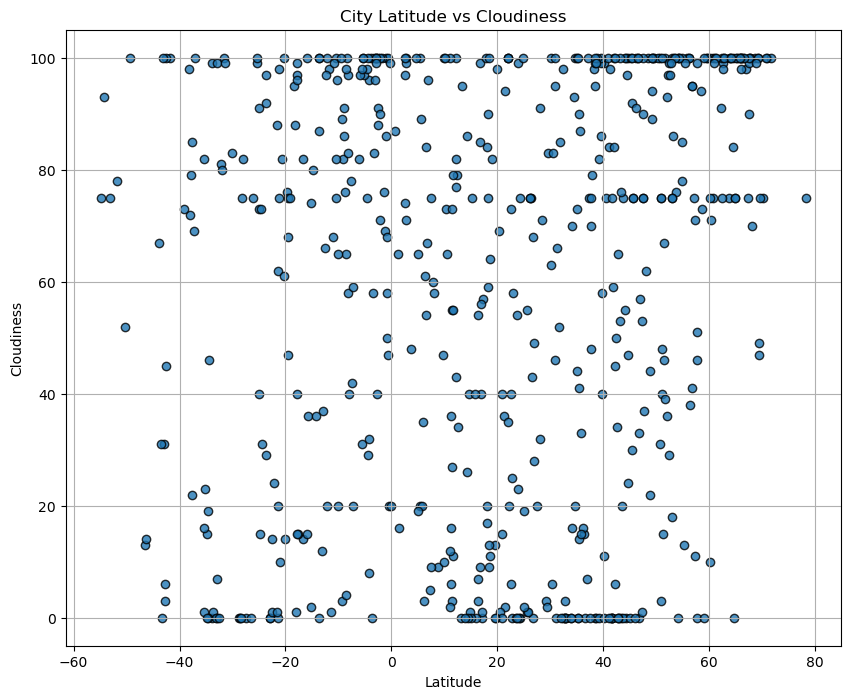

In [68]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, axl = plt.subplots(figsize=(10,8))

plt.scatter(x_values, y_values,alpha=0.80, edgecolors="black", linewidths=1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

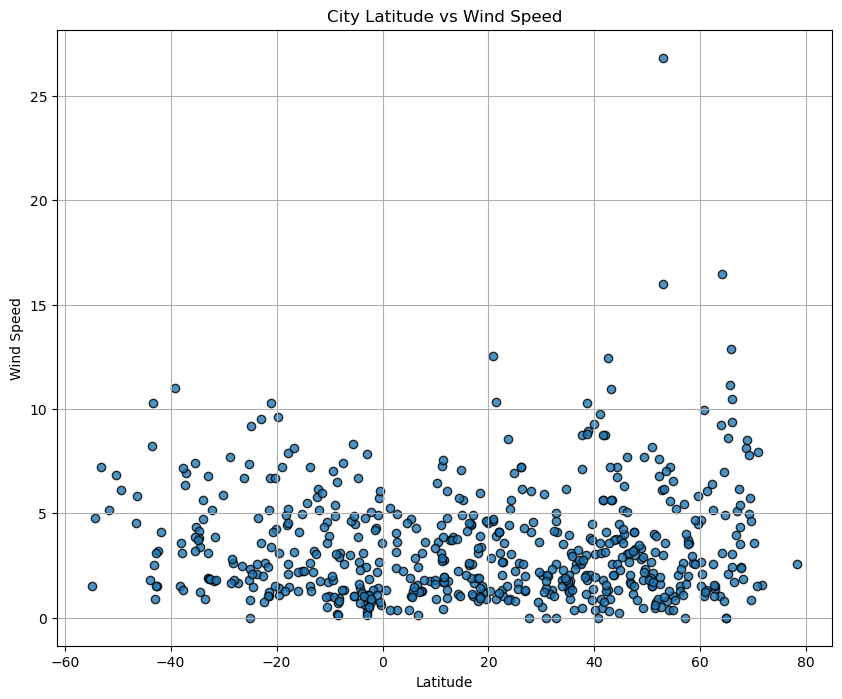

In [69]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, axl = plt.subplots(figsize=(10,8))

plt.scatter(x_values, y_values,alpha=0.80, edgecolors="black", linewidths=1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,14.40,85,100,6.17,US,1731369928
1,newman,37.3138,-121.0208,12.80,82,75,2.60,US,1731369929
3,iqaluit,63.7506,-68.5145,-10.15,85,75,1.03,CA,1731369931
4,fort st. john,56.2499,-120.8529,-1.06,93,100,1.54,CA,1731369932
6,olonkinbyen,70.9221,-8.7187,0.36,96,100,7.93,SJ,1731369934


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,whakatane,-37.9585,176.9854,21.95,68,72,3.58,NZ,1731369930
5,blackmans bay,-43.0167,147.3167,18.18,48,31,0.89,AU,1731369933
7,namibe,-15.1961,12.1522,21.40,72,2,2.24,AO,1731369935
8,waitangi,-43.9535,-176.5597,13.79,74,67,1.79,NZ,1731369936
9,ushuaia,-54.8000,-68.3000,7.81,81,75,1.54,AR,1731369937


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8379013080264777


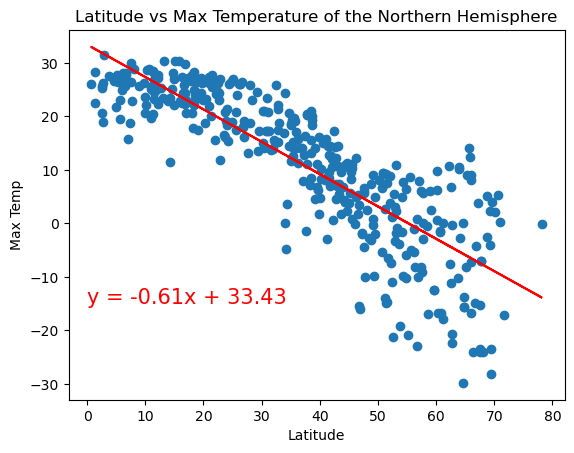

In [87]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Latitude vs Max Temperature of the Northern Hemisphere')
print(f'The r-value is {rvalue}')
plt.show()

The r-value is 0.7008990067992009


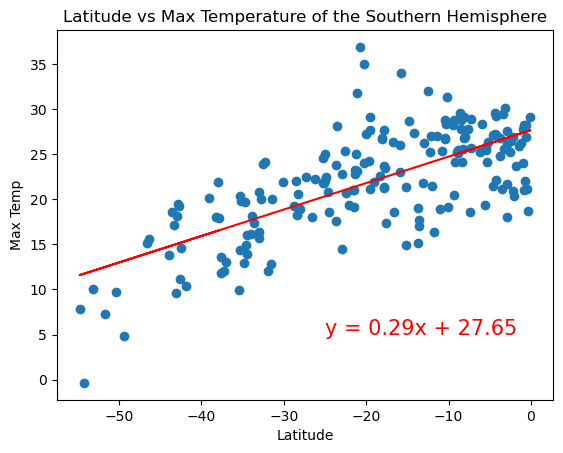

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Latitude vs Max Temperature of the Southern Hemisphere')
print(f'The r-value is {rvalue}')

plt.show()

<u>**Discussion about the linear relationship:**</u><br>
The regression displays a negative relationship between temperature and latitude in the northern hemisphere, <br>
as the latitude increases the distance away from the equator, the max temperature decreases. The same goes<br>
to the southern hemisphere, as the closer the latitude gets to the equator, the max temperature rises.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3241160083557406


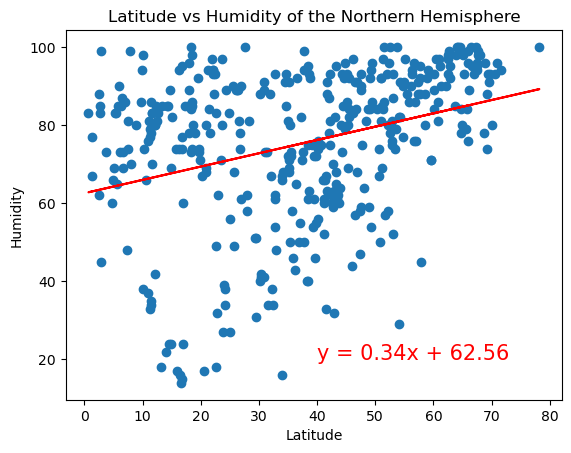

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude vs Humidity of the Northern Hemisphere')
print(f'The r-value is {rvalue}')

# Show plot
plt.show()

The r-value is 0.26565731144170335


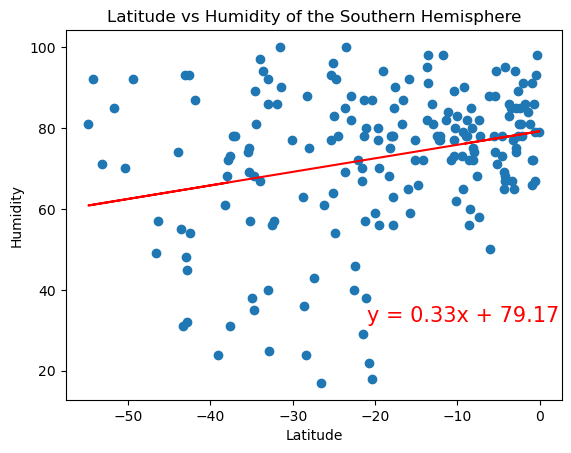

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-21,32),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude vs Humidity of the Southern Hemisphere')
print(f'The r-value is {rvalue}')

# Show plot
plt.show()

<u>**Discussion about the linear relationship:**</u><br>
The relationship in both hemispheres are slightly positive but doesn't seem<br>
to have a strong correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.32288520589799075


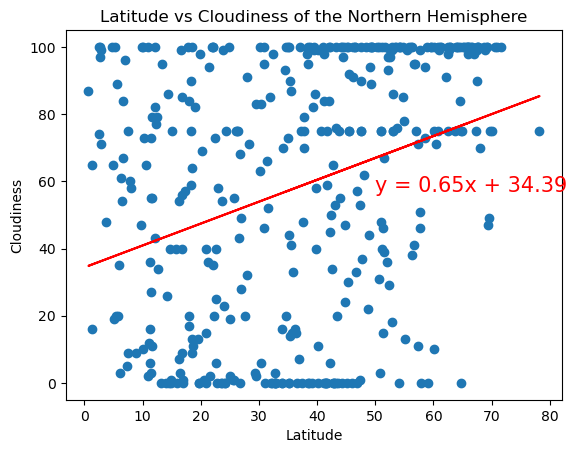

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(50,57),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs Cloudiness of the Northern Hemisphere')
print(f'The r-value is {rvalue}')

# Show plot
plt.show()

The r-value is 0.23206336785554377


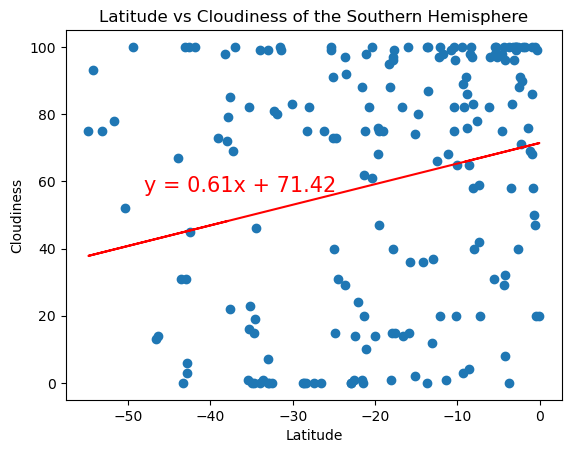

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-48,57),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs Cloudiness of the Southern Hemisphere')
print(f'The r-value is {rvalue}')

# Show plot
plt.show()

<u>**Discussion about the linear relationship:**</u><br>
The regression again is slightly positive for both hemispheres but seems like<br>
there is no correlation to the latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.1656726289811719


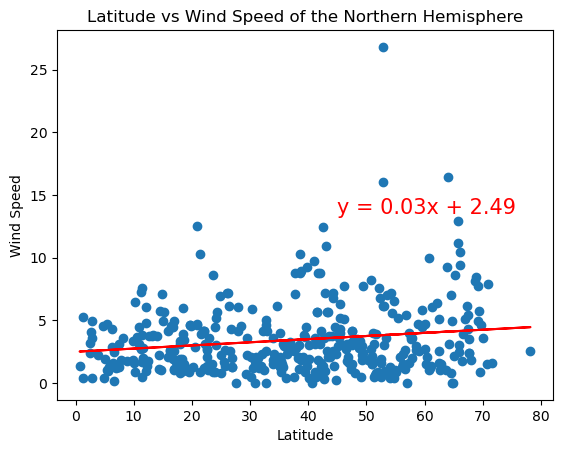

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,13.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Latitude vs Wind Speed of the Northern Hemisphere')
print(f'The r-value is {rvalue}')

# Show plot
plt.show()

The r-value is -0.23765871197014352


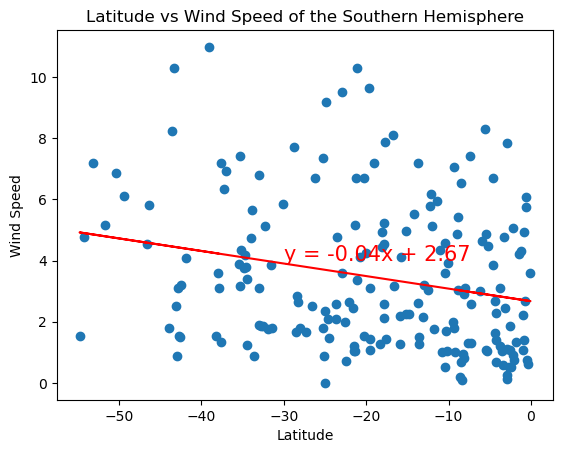

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,4),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Latitude vs Wind Speed of the Southern Hemisphere')
print(f'The r-value is {rvalue}')

# Show plot
plt.show()

<u>**Discussion about the linear relationship:**</u><br>
Though the northern and southern hemispheres show slightly different angles of<br>
regression, the latitude and wind speed seem to be no strong correlation to the two.